In [4]:
import numpy as np
import matplotlib.pyplot as plt
import spacy
import pandas as pd
from spacy import displacy

nlp = spacy.load('en_core_web_lg')

In [17]:
doc = '''Frank: I'll try. But probably not the entire model.
         Hoang: Wait, we also have the presentation coming soon. Maybe we should do the slides first.
         Frank: It's ok, we finished the models. 
         Nikesh: Just want to raise that the product prototype is ready, we can also include that.
'''

doc = nlp(doc)

Number of sentences: 8

POS distribution:



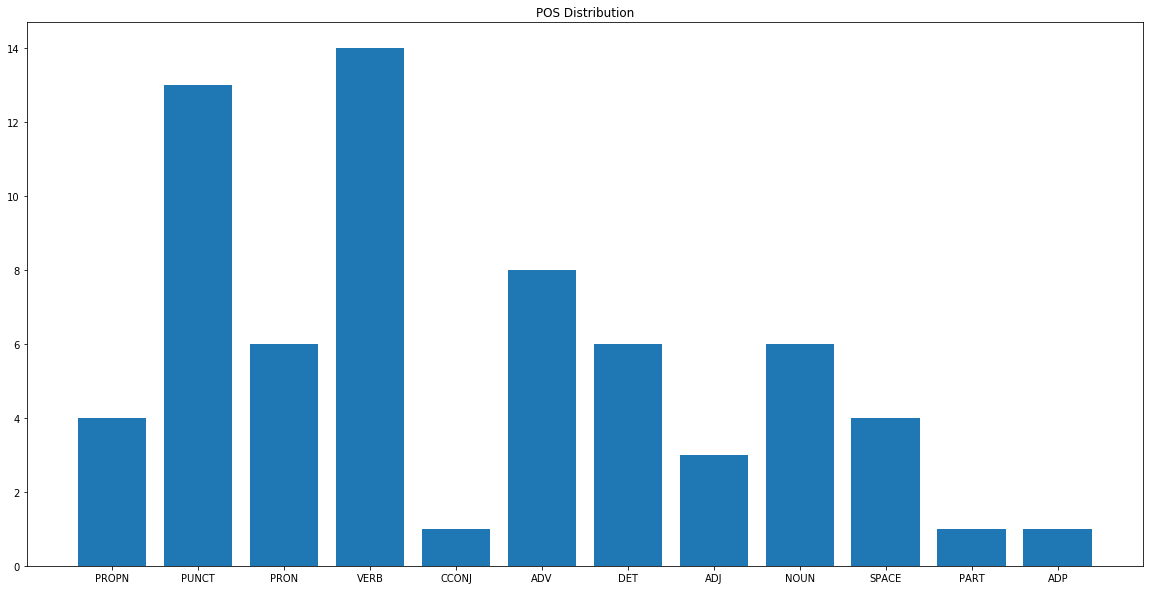

Detailed POS distribution:



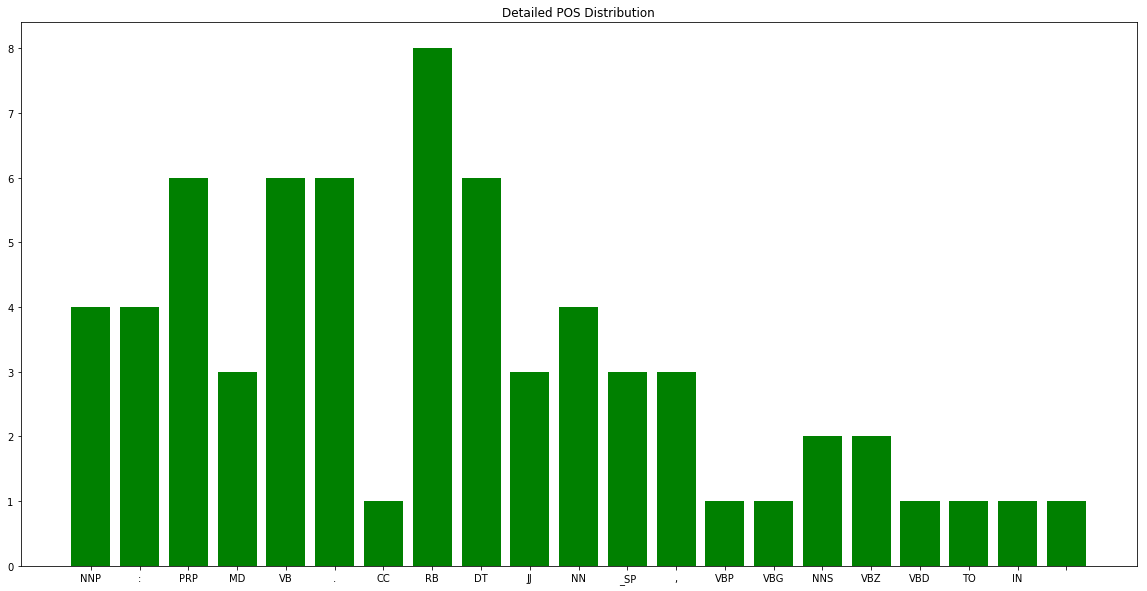

Detected entities:



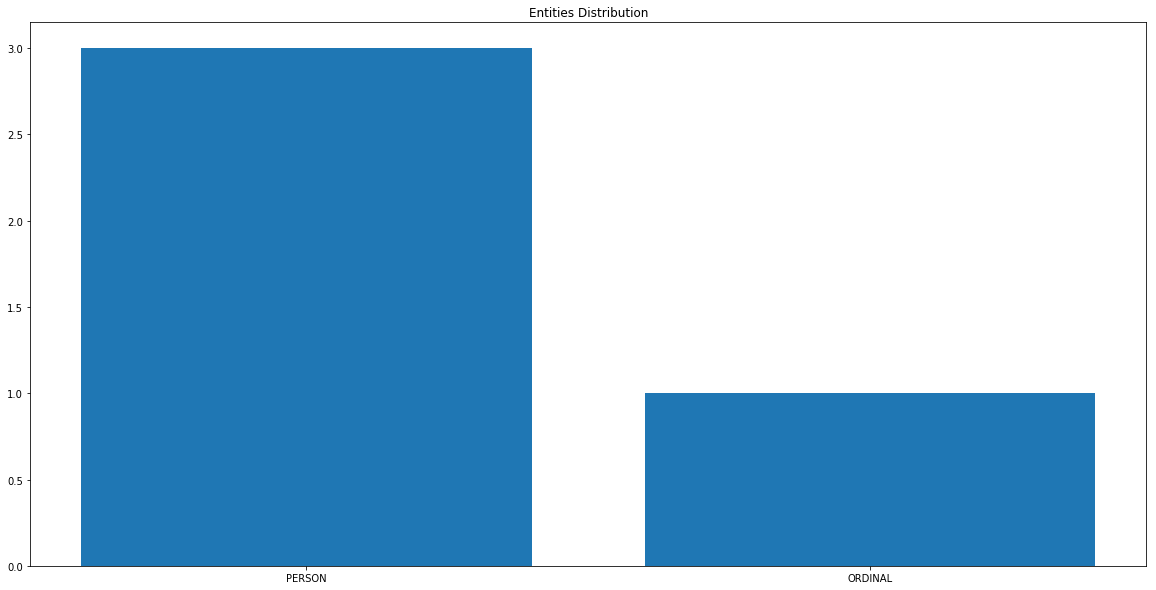

Dependencies for each sentence:
Dependency for sentence 1





Dependency for sentence 2





Dependency for sentence 3





Dependency for sentence 4





Dependency for sentence 5





Dependency for sentence 6





Dependency for sentence 7





Dependency for sentence 8



In [18]:
from collections import Counter

def extract_doc_info(spacy_doc, ner_return=False, dep_return=True):
    print('Number of sentences: {}\n'.format(len([sent for sent in spacy_doc.sents])))
    
    print('POS distribution:\n')
    word_pos = [token.pos_ for token in spacy_doc]
    plt.figure(figsize=(20,10))
    plt.bar(Counter(word_pos).keys(), Counter(word_pos).values())
    plt.title('POS Distribution')
    plt.show()
    
    print('Detailed POS distribution:\n')
    word_pos = [token.tag_ for token in spacy_doc]
    plt.figure(figsize=(20,10))
    plt.bar(Counter(word_pos).keys(), Counter(word_pos).values(), color='g')
    plt.title('Detailed POS Distribution')
    plt.show()
    
    print('Detected entities:\n')
    org_text, ner_label, des = [], [], []
    for ent in spacy_doc.ents:
        org_text.append(ent.text)
        ner_label.append(ent.label_)
        des.append(spacy.explain(ent.label_))
    ner = {'Text': org_text, 'NER Label': ner_label, 'Description': des}
    ner = pd.DataFrame(ner)
    ners = [ent.label_ for ent in spacy_doc.ents]
    plt.figure(figsize=(20,10))
    plt.bar(Counter(ners).keys(), Counter(ners).values())
    plt.title('Entities Distribution')
    plt.show()
    
    displacy.render(spacy_doc, style='ent', jupyter=True)
    
    if dep_return == True: 
        print('Dependencies for each sentence:')
        i = 1
        for sent in spacy_doc.sents:
            print('Dependency for sentence {}\n'.format(i))
            displacy.render(sent, jupyter=True)
            print('\n')
            i += 1
    
    if ner_return == True: 
        return ner
    
        
        
    
extract_doc_info(doc)
    

In [23]:
from sklearn.cluster import KMeans

sentences = [sent for sent in doc.sents]
train_vecs = [text.vector for text in sentences]
clusterer = KMeans(3)
clusterer.fit(train_vecs)

preds = clusterer.predict(train_vecs)

for _ in range(len([sent for sent in doc.sents])):
    print("_"*20)
    print('Sentence: {}\n'.format(sentences[_].text))
    print('Cluster: {}\n'.format(preds[_]))
    print("_"*20)

____________________
Sentence: 


Actress Julia Roberts will play the part of a spider in a new film version of children's classic Charlotte's Web.



Cluster: 1

____________________
____________________
Sentence: She will voice Charlotte, who teams up with a girl to save their friend Wilbur the pig, in the story by EB White.

Cluster: 1

____________________
____________________
Sentence: The film - a mix of live action and animation - will be Roberts' first project since the birth of her twins, Hazel and Phinnaeus, two months ago.

Cluster: 1

____________________
____________________
Sentence: Oprah Winfrey will voice a goose, John Cleese will voice a sheep and Steve Buscemi a rat in the 2006 film.



Cluster: 1

____________________
____________________
Sentence: Ten-year-old Dakota Fanning will play Fern, the girl at the centre of the story, in the film to be directed by 13 Going on 30 film-maker Gary Winick.

Cluster: 1

____________________
____________________
Sentence: Filmin

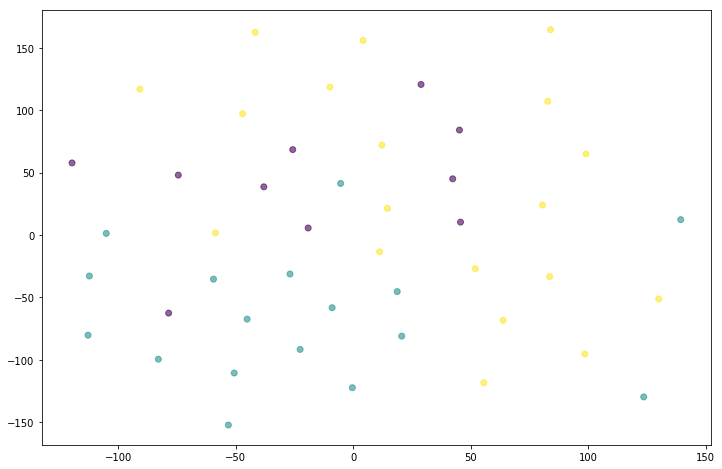

In [25]:
from sklearn.manifold import TSNE
%matplotlib inline
mat = np.array(train_vecs)
sne = TSNE(n_components=2)
trans = sne.fit_transform(mat)

labels = [1 for i in range(10)] + [2 for i in range(17)] + [3 for i in range(19)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(trans[:,0], trans[:, 1],c =labels, alpha=0.6)
plt.show()

In [11]:
doc

Ash: Frank, I think you should finish the model by the end of this week